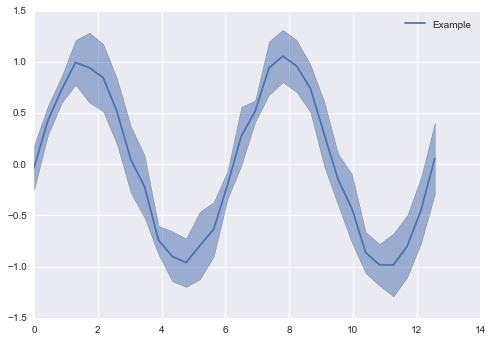

In [1]:
%matplotlib inline
from taskcode import plotting

# An example series with errorbars
plotting.main()

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open('TaskCodeTimestamps.pkl','r') as infile:
    timestamps = pickle.load(infile)
    
timestamps.head()

,start_time,end_time,first_name,last_name,task,room
1,2016-05-24 17:51:45.929230+00:00,2016-05-24 18:19:35.422266+00:00,Plumber,2,10,49
2,2016-05-24 16:57:34.369723+00:00,2016-05-24 17:51:46.110982+00:00,Plumber,2,7,49
4,2016-03-01 21:09:05.088310+00:00,2016-03-02 16:24:01.019356+00:00,Plumber,2,9,24
6,2016-03-01 21:14:32.622069+00:00,2016-03-01 21:14:32.637671+00:00,Plumber,2,9,25
7,2016-03-01 21:14:32.656067+00:00,2016-03-01 21:14:32.671939+00:00,Plumber,2,9,0


In [3]:
print timestamps.count()

timestamps['duration'] = (timestamps.end_time - timestamps.start_time) / pd.Timedelta('1h')

print timestamps[timestamps.duration > 8]

start_time    858
end_time      858
first_name    858
last_name     858
task          858
room          858
dtype: int64
                           start_time                         end_time  \
4    2016-03-01 21:09:05.088310+00:00 2016-03-02 16:24:01.019356+00:00   
56   2016-02-22 18:28:39.619262+00:00 2016-02-23 16:05:33.412534+00:00   
60   2016-02-18 22:11:26.662929+00:00 2016-02-19 15:44:24.913496+00:00   
64   2016-02-08 22:40:13.411433+00:00 2016-02-09 15:45:54.759319+00:00   
70   2016-02-05 21:13:48.407078+00:00 2016-02-08 20:14:54.532935+00:00   
180  2016-01-28 22:57:40.412017+00:00 2016-01-29 13:33:47.870669+00:00   
486  2016-02-04 21:36:07.000133+00:00 2016-02-05 15:26:45.890943+00:00   
989  2016-01-22 17:55:55.144518+00:00 2016-02-04 16:08:58.554257+00:00   
1031 2016-03-07 22:05:45.943112+00:00 2016-03-08 15:25:54.670141+00:00   

       first_name last_name  task  room    duration  
4         Plumber         2     9    24   19.248870  
56        Plumber         2   

## Quick Summary

There aren't any missing data fields, but it looks like there are a few outliers in task duration. Will ignore them in the short term, but it could be interesting to see what they look like with the location data.

task
1      79
2     148
3     108
4     134
5      17
6      48
8      53
9      55
10    109
11     81
dtype: int64


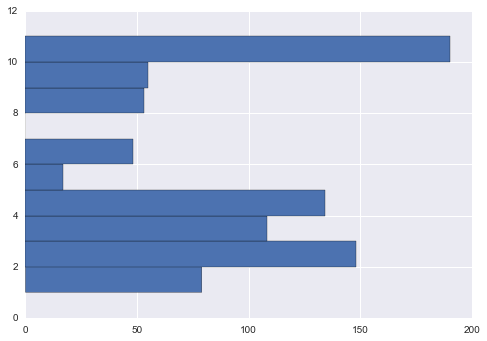

In [17]:
timestamps = timestamps[timestamps.duration <= 8]

sizes = timestamps.groupby(timestamps.task).size()
print sizes
timestamps.task.hist(orientation='horizontal')

In [18]:
common = sizes[sizes > 10].index
print common

# Keep just the common tasks for now
timestamps = timestamps[timestamps.task.isin(common)]

Int64Index([1, 2, 3, 4, 5, 6, 8, 9, 10, 11], dtype='int64', name=u'task')


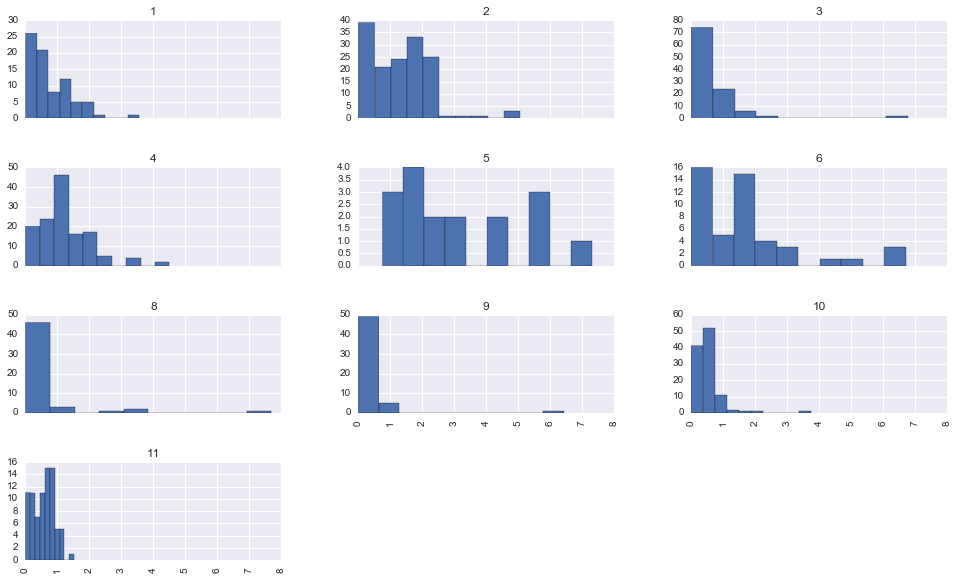

In [22]:
timestamps.duration.hist(by=timestamps.task, figsize=(16,10),sharex=True);

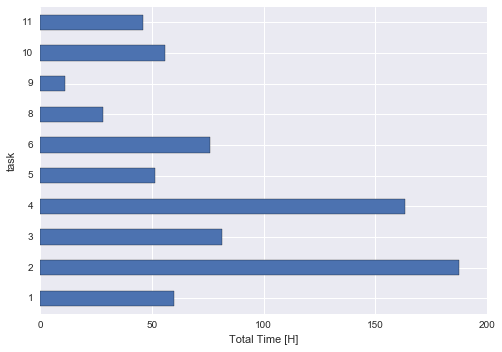

In [29]:
# How much total time per task?

timestamps.groupby(timestamps.task).sum().duration.plot(kind='barh')
plt.xlabel('Total Time [H]')